Feature selection process

In [69]:
import pandas as pd

In [70]:
pancreatic_cellline=[['PSN1','MIAPaCa2','CAPAN1','BxPC3','CFPAC1','AsPC1','CAPAN2','PANC0327','PANC0813','PANC1005','CCK81','PATU8988T','SUIT2','HPAC','PANC0203','PANC0403','PATU8902','QGP1']]

In [71]:
CCLE_chromatin=pd.read_csv('CCLE_chromatin.csv')

In [72]:
import pandas as pd

# Define the list of cell line names
Pancr_cell_line = ['PSN1', 'MIAPaCa2', 'CAPAN1', 'BXPC3', 'CFPAC1', 'ASPC1', 'CAPAN2', 'PANC0327', 'PANC0813', 'PANC1005', 'CCK81', 'PATU8988T', 'SUIT2', 'HPAC', 'PANC0203', 'PANC0403', 'PATU8902', 'QGP1']

# Create a DataFrame with a column named 'CELL_LINE'
pancancer = pd.DataFrame({'CELL_LINE': Pancr_cell_line})

# Now, the 'df' DataFrame contains the 'CELL_LINE' column with the specified cell line names
# Assuming 'CELL_LINE' is a common column between pancancer and CCLE_chromatin
CCLE_chromatin = CCLE_chromatin.merge(pancancer[['CELL_LINE']], on='CELL_LINE', how='inner')

# Now, filtered_CCLE_chromatin contains only the rows with 'CELL_LINE' values present in pancancer


In [74]:
CCLE_chromatin

,CellLineName,CELL_LINE,CELL_LINE_NAME,BroadID,H3K4me0,H3K4me1,H3K4me2,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,...,H3K56me0,H3K56me1,H3K79me0,H3K79me1,H3K79me2,DRUG_NAME,IC50,AUC,Cluster,IC50_Class
0,HPAC_PANCREAS,HPAC,PANCREAS,ACH-000270,0.163498,0.373213,-0.052332,1.021589,0.030446,-0.229386,...,0.405092,NaN,0.065864,0.292132,0.174547,Nilotinib,7.072412,0.95970,0.0,High
1,HPAC_PANCREAS,HPAC,PANCREAS,ACH-000270,0.163498,0.373213,-0.052332,1.021589,0.030446,-0.229386,...,0.405092,NaN,0.065864,0.292132,0.174547,17-AAG,0.090495,3.90500,1.0,Low
2,HPAC_PANCREAS,HPAC,PANCREAS,ACH-000270,0.163498,0.373213,-0.052332,1.021589,0.030446,-0.229386,...,0.405092,NaN,0.065864,0.292132,0.174547,PHA-665752,0.054660,1.16330,1.0,Low
3,HPAC_PANCREAS,HPAC,PANCREAS,ACH-000270,0.163498,0.373213,-0.052332,1.021589,0.030446,-0.229386,...,0.405092,NaN,0.065864,0.292132,0.174547,Lapatinib,8.000000,0.50410,0.0,High
4,HPAC_PANCREAS,HPAC,PANCREAS,ACH-000270,0.163498,0.373213,-0.052332,1.021589,0.030446,-0.229386,...,0.405092,NaN,0.065864,0.292132,0.174547,Nutlin-3,8.000000,0.69480,0.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,PSN1_PANCREAS,PSN1,PANCREAS,ACH-000320,0.195761,0.019582,0.266214,0.081958,0.600551,0.639993,...,0.215729,NaN,0.439061,0.085986,0.297424,AZD6244,0.797091,2.46930,1.0,Low
145,PSN1_PANCREAS,PSN1,PANCREAS,ACH-000320,0.195761,0.019582,0.266214,0.081958,0.600551,0.639993,...,0.215729,NaN,0.439061,0.085986,0.297424,PLX4720,8.000000,0.07306,0.0,High
146,PSN1_PANCREAS,PSN1,PANCREAS,ACH-000320,0.195761,0.019582,0.266214,0.081958,0.600551,0.639993,...,0.215729,NaN,0.439061,0.085986,0.297424,NVP-TAE684,7.245392,0.86930,0.0,High
147,PSN1_PANCREAS,PSN1,PANCREAS,ACH-000320,0.195761,0.019582,0.266214,0.081958,0.600551,0.639993,...,0.215729,NaN,0.439061,0.085986,0.297424,Erlotinib,8.000000,0.21990,0.0,High


In [75]:
selected=['H3K4ac1','H3K18ac0K23ub1','H3K56me1']

In [76]:
CCLE_chromatin=CCLE_chromatin.drop(selected,axis=1)

In [77]:
CCLE_chromatin = CCLE_chromatin.dropna(subset=['DRUG_NAME', 'IC50', 'AUC', 'Cluster', 'IC50_Class'])

In [78]:
CCLE_chromatin = CCLE_chromatin.interpolate(method='polynomial', order=2)

In [79]:
CCLE_chromatin.isna().sum()

CellLineName        0
CELL_LINE           0
CELL_LINE_NAME      0
BroadID             0
H3K4me0             0
H3K4me1             0
H3K4me2             0
H3K9me0K14ac0       0
H3K9me1K14ac0       0
H3K9me2K14ac0       0
H3K9me3K14ac0       0
H3K9ac1K14ac0       0
H3K9me0K14ac1       0
H3K9me1K14ac1       0
H3K9me2K14ac1       0
H3K9me3K14ac1       0
H3K9ac1K14ac1       0
H3K18ac0K23ac0      0
H3K18ac1K23ac0      0
H3K18ac0K23ac1      0
H3K18ac1K23ac1      0
H3K27me0K36me0      0
H3K27me0K36me1      0
H3K27me0K36me2      0
H3K27me0K36me3      0
H3K27me1K36me0      0
H3K27me1K36me1      0
H3K27me1K36me2      0
H3K27me1K36me3      0
H3K27me2K36me0      0
H3K27me2K36me1      0
H3K27me2K36me2      0
H3K27me3K36me0      0
H3K27me3K36me1      0
H3K27ac1K36me0      0
H3K27ac1K36me1      0
H3K27ac1K36me2      0
H3K27ac1K36me3      0
H3.3K27me0K36me0    0
H3K56me0            0
H3K79me0            0
H3K79me1            0
H3K79me2            0
DRUG_NAME           0
IC50                0
AUC       

In [81]:
CCLE_chromatin.columns

Index(['CellLineName', 'CELL_LINE', 'CELL_LINE_NAME', 'BroadID', 'H3K4me0',
       'H3K4me1', 'H3K4me2', 'H3K9me0K14ac0', 'H3K9me1K14ac0', 'H3K9me2K14ac0',
       'H3K9me3K14ac0', 'H3K9ac1K14ac0', 'H3K9me0K14ac1', 'H3K9me1K14ac1',
       'H3K9me2K14ac1', 'H3K9me3K14ac1', 'H3K9ac1K14ac1', 'H3K18ac0K23ac0',
       'H3K18ac1K23ac0', 'H3K18ac0K23ac1', 'H3K18ac1K23ac1', 'H3K27me0K36me0',
       'H3K27me0K36me1', 'H3K27me0K36me2', 'H3K27me0K36me3', 'H3K27me1K36me0',
       'H3K27me1K36me1', 'H3K27me1K36me2', 'H3K27me1K36me3', 'H3K27me2K36me0',
       'H3K27me2K36me1', 'H3K27me2K36me2', 'H3K27me3K36me0', 'H3K27me3K36me1',
       'H3K27ac1K36me0', 'H3K27ac1K36me1', 'H3K27ac1K36me2', 'H3K27ac1K36me3',
       'H3.3K27me0K36me0', 'H3K56me0', 'H3K79me0', 'H3K79me1', 'H3K79me2',
       'DRUG_NAME', 'IC50', 'AUC', 'Cluster', 'IC50_Class'],
      dtype='object')

In [82]:
CCLE_chromatin_towork=CCLE_chromatin[['H3K4me0',
       'H3K4me1', 'H3K4me2', 'H3K9me0K14ac0', 'H3K9me1K14ac0', 'H3K9me2K14ac0',
       'H3K9me3K14ac0', 'H3K9ac1K14ac0', 'H3K9me0K14ac1', 'H3K9me1K14ac1',
       'H3K9me2K14ac1', 'H3K9me3K14ac1', 'H3K9ac1K14ac1', 'H3K18ac0K23ac0',
       'H3K18ac1K23ac0', 'H3K18ac0K23ac1', 'H3K18ac1K23ac1', 'H3K27me0K36me0',
       'H3K27me0K36me1', 'H3K27me0K36me2', 'H3K27me0K36me3', 'H3K27me1K36me0',
       'H3K27me1K36me1', 'H3K27me1K36me2', 'H3K27me1K36me3', 'H3K27me2K36me0',
       'H3K27me2K36me1', 'H3K27me2K36me2', 'H3K27me3K36me0', 'H3K27me3K36me1',
       'H3K27ac1K36me0', 'H3K27ac1K36me1', 'H3K27ac1K36me2', 'H3K27ac1K36me3',
       'H3.3K27me0K36me0', 'H3K56me0', 'H3K79me0', 'H3K79me1', 'H3K79me2','Cluster']]

In [83]:
CCLE_chromatin_towork.columns

Index(['H3K4me0', 'H3K4me1', 'H3K4me2', 'H3K9me0K14ac0', 'H3K9me1K14ac0',
       'H3K9me2K14ac0', 'H3K9me3K14ac0', 'H3K9ac1K14ac0', 'H3K9me0K14ac1',
       'H3K9me1K14ac1', 'H3K9me2K14ac1', 'H3K9me3K14ac1', 'H3K9ac1K14ac1',
       'H3K18ac0K23ac0', 'H3K18ac1K23ac0', 'H3K18ac0K23ac1', 'H3K18ac1K23ac1',
       'H3K27me0K36me0', 'H3K27me0K36me1', 'H3K27me0K36me2', 'H3K27me0K36me3',
       'H3K27me1K36me0', 'H3K27me1K36me1', 'H3K27me1K36me2', 'H3K27me1K36me3',
       'H3K27me2K36me0', 'H3K27me2K36me1', 'H3K27me2K36me2', 'H3K27me3K36me0',
       'H3K27me3K36me1', 'H3K27ac1K36me0', 'H3K27ac1K36me1', 'H3K27ac1K36me2',
       'H3K27ac1K36me3', 'H3.3K27me0K36me0', 'H3K56me0', 'H3K79me0',
       'H3K79me1', 'H3K79me2', 'Cluster'],
      dtype='object')

filtering pancreatic cell line names

feature selection methods

In [ ]:
!pip install Boruta
!pip install shap

In [85]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from collections import Counter

# Define the feature selection methods
methods = [
    ('Mutual Information', SelectKBest(mutual_info_classif, k=20)),
    ('Random Forest', SelectKBest(lambda X, y: RandomForestClassifier(n_estimators=100).fit(X, y).feature_importances_, k=20)),
    ('Chi-squared', SelectKBest(chi2, k=20)),
    ('RFE', RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=20)),
    ('LASSO', SelectFromModel(Lasso(alpha=0.01))),
    # Add more methods as needed
]

# Initialize a dictionary to keep track of feature selections
selected_features_CCLE_chromatin = {feature: 0 for feature in CCLE_chromatin_towork.columns}

# Define X and y outside the loop
X = CCLE_chromatin_towork.drop('Cluster', axis=1)  # Features
# Apply Min-Max scaling to make all values non-negative
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = CCLE_chromatin_towork['Cluster']  # Target

# Apply feature selection methods
for method_name, method in methods:
    # Fit the feature selection method
    method.fit(X, y)

    # Update the selected_features dictionary based on the selected features
    selected_indices_chromatin = method.get_support(indices=True)
    for feature_idx in selected_indices_chromatin:
        selected_features_CCLE_chromatin[CCLE_chromatin_towork.columns[feature_idx]] += 1

# Find the top 20 features most frequently selected
top_20_features_CCLE_chromatin = [feature for feature, count in Counter(selected_features_CCLE_chromatin).most_common(20)]

# Create a new DataFrame with the top 20 features
top_20_counts_CCLE_chromatin = CCLE_chromatin_towork[top_20_features_CCLE_chromatin + ['Cluster']]


Plotting the counts

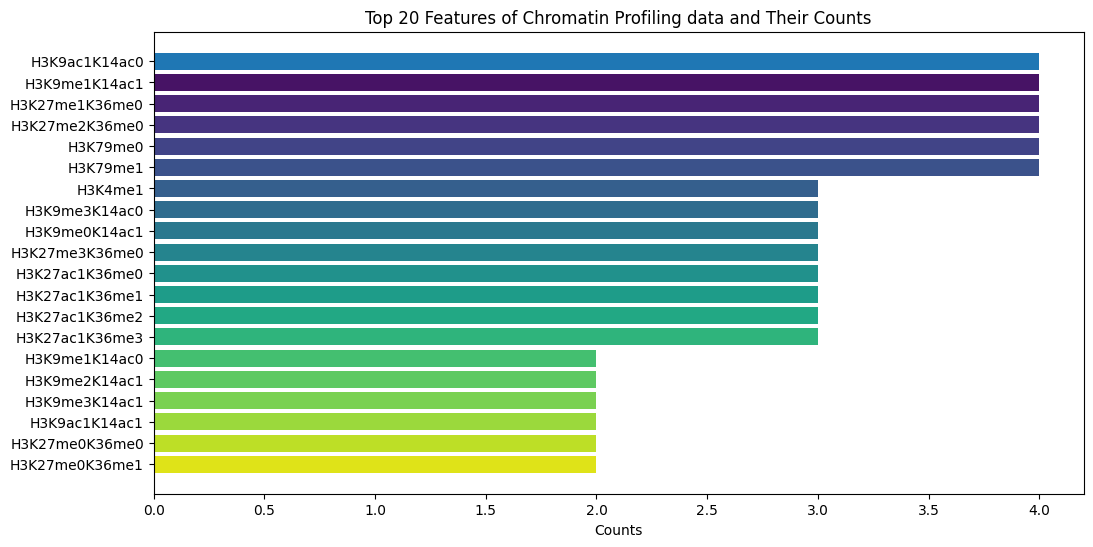

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Find the top 20 features most frequently selected
top_features_with_counts_CCLE_chromatin = [(feature, count) for feature, count in Counter(selected_features_CCLE_chromatin).most_common(20)]

# Extract the top 20 features and their counts into separate lists
top_20_features_CCLE_chromatin = [feature for feature, count in top_features_with_counts_CCLE_chromatin]
top_20_counts_CCLE_chromatin = [count for feature, count in top_features_with_counts_CCLE_chromatin]

# Define a single color shade that decreases for each feature
base_color = '#1f77b4'  # Base color

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a range of colors with decreasing brightness
colors = [base_color if i == 0 else plt.cm.viridis(i / 20) for i in range(20)]

# Create a colorful bar chart with decreasing color shade
bars = ax.barh(top_20_features_CCLE_chromatin, top_20_counts_CCLE_chromatin, color=colors)
plt.xlabel('Counts')
plt.title('Top 20 Features of Chromatin Profiling data and Their Counts')
plt.gca().invert_yaxis()

# Display the chart
plt.show()


In [ ]:
import pandas as pd
from collections import Counter
import plotly.express as px

# Find the top 20 features most frequently selected
top_features_with_counts_CCLE_chromatin = [(feature, count) for feature, count in Counter(selected_features_CCLE_chromatin).most_common(20)]

# Create a DataFrame for the top 20 features and their counts
top_features_CCLE_chromatin = pd.DataFrame(top_features_with_counts_CCLE_chromatin, columns=['Feature', 'Count'])

# Create a treemap using Plotly Express
fig = px.treemap(top_features_CCLE_chromatin, path=['Feature'], values='Count', color='Count')

# Customize the appearance of the treemap
fig.update_layout(
    title='Top 20 Features of Chromatin Profiling and Their Counts (Treemap)',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the treemap
fig.show()


In [ ]:
final_chromatin=CCLE_chromatin_towork[['CELL_LINE'] + top_20_features_CCLE_chromatin]

In [ ]:
final_chromatin

,CELL_LINE,H3K9ac1K14ac0,H3K9me1K14ac1,H3K27me1K36me0,H3K27me2K36me0,H3K79me0,H3K79me1,H3K4me1,H3K9me3K14ac0,H3K9me0K14ac1,...,H3K27ac1K36me0,H3K27ac1K36me1,H3K27ac1K36me2,H3K27ac1K36me3,H3K9me1K14ac0,H3K9me2K14ac1,H3K9me3K14ac1,H3K9ac1K14ac1,H3K27me0K36me0,H3K27me0K36me1
2,NCIH1694,-0.427160,0.906119,-0.849408,-0.417356,0.185984,0.191760,0.29844,-0.220467,0.215504,...,0.055683,-0.659294,0.114288,-1.289012,0.133280,0.923124,0.938963,0.071732,-0.499895,-0.056093
3,NCIH1694,-0.427160,0.906119,-0.849408,-0.417356,0.185984,0.191760,0.29844,-0.220467,0.215504,...,0.055683,-0.659294,0.114288,-1.289012,0.133280,0.923124,0.938963,0.071732,-0.499895,-0.056093
4,NCIH1694,-0.427160,0.906119,-0.849408,-0.417356,0.185984,0.191760,0.29844,-0.220467,0.215504,...,0.055683,-0.659294,0.114288,-1.289012,0.133280,0.923124,0.938963,0.071732,-0.499895,-0.056093
5,NCIH1694,-0.427160,0.906119,-0.849408,-0.417356,0.185984,0.191760,0.29844,-0.220467,0.215504,...,0.055683,-0.659294,0.114288,-1.289012,0.133280,0.923124,0.938963,0.071732,-0.499895,-0.056093
6,NCIH1694,-0.427160,0.906119,-0.849408,-0.417356,0.185984,0.191760,0.29844,-0.220467,0.215504,...,0.055683,-0.659294,0.114288,-1.289012,0.133280,0.923124,0.938963,0.071732,-0.499895,-0.056093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,OE21,0.004067,0.275364,0.197919,0.374461,0.166375,0.226403,0.07189,-0.837019,0.068991,...,0.682899,-0.204362,0.003462,-0.022484,0.182696,0.346706,0.317147,-0.047163,0.071510,0.330937
5347,OE21,0.004067,0.275364,0.197919,0.374461,0.166375,0.226403,0.07189,-0.837019,0.068991,...,0.682899,-0.204362,0.003462,-0.022484,0.182696,0.346706,0.317147,-0.047163,0.071510,0.330937
5348,OE21,0.004067,0.275364,0.197919,0.374461,0.166375,0.226403,0.07189,-0.837019,0.068991,...,0.682899,-0.204362,0.003462,-0.022484,0.182696,0.346706,0.317147,-0.047163,0.071510,0.330937
5349,OE21,0.004067,0.275364,0.197919,0.374461,0.166375,0.226403,0.07189,-0.837019,0.068991,...,0.682899,-0.204362,0.003462,-0.022484,0.182696,0.346706,0.317147,-0.047163,0.071510,0.330937


Reverse Phase Protein Array

In [ ]:
CCLE_RPPA=pd.read_csv('CCLE_RPPA.csv')

In [ ]:
CCLE_RPPA.shape

(4775, 222)

In [ ]:
CCLE_RPPA= CCLE_RPPA.dropna(subset=['DRUG_NAME', 'IC50', 'AUC', 'Cluster', 'IC50_Class'])

In [ ]:
CCLE_RPPA.isna().sum()

In [ ]:
CCLE_RPPA.columns

Index(['CellLineName', 'CELL_LINE', 'CELL_LINE_NAME', '14-3-3_beta',
       '14-3-3_epsilon_Caution', '14-3-3_zeta', '4E-BP1', '4E-BP1_pS65',
       '4E-BP1_pT37_T46', '4E-BP1_pT70',
       ...
       'XRCC1_Caution', 'YAP_Caution', 'YAP_pS127_Caution', 'YB-1',
       'YB-1_pS102', 'DRUG_NAME', 'IC50', 'AUC', 'Cluster', 'IC50_Class'],
      dtype='object', length=222)

In [ ]:
selected1=['CellLineName', 'CELL_LINE_NAME','DRUG_NAME', 'IC50', 'AUC','IC50_Class']

In [ ]:
CCLE_RPPA_toWork = CCLE_RPPA.drop(selected1,axis=1)

In [ ]:
CCLE_RPPA_toWork.columns

Index(['CELL_LINE', '14-3-3_beta', '14-3-3_epsilon_Caution', '14-3-3_zeta',
       '4E-BP1', '4E-BP1_pS65', '4E-BP1_pT37_T46', '4E-BP1_pT70', '53BP1',
       'A-Raf_pS299_Caution',
       ...
       'VAV1_Caution', 'VEGFR2', 'VHL_Caution', 'XBP1_Caution',
       'XRCC1_Caution', 'YAP_Caution', 'YAP_pS127_Caution', 'YB-1',
       'YB-1_pS102', 'Cluster'],
      dtype='object', length=216)

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from collections import Counter

# Define a simple RFA (Recursive Feature Addition) method
def custom_rfa_method(X, y, n_features_to_select):
    selected_features = set()
    while len(selected_features) < n_features_to_select:
        best_feature = None
        best_score = -1  # Initialize with a low score
        for feature in X.columns:
            if feature not in selected_features:
                # Calculate the mutual information score (you can replace it with your custom scoring method)
                X_selected = X[list(selected_features) + [feature]]
                score = mutual_info_classif(X_selected, y)[0]
                if score > best_score:
                    best_score = score
                    best_feature = feature
        selected_features.add(best_feature)
    return list(selected_features)

# Define the feature selection methods
methods = [
    ('Mutual Information', SelectKBest(mutual_info_classif, k=20)),
    ('Random Forest', SelectKBest(lambda X, y: RandomForestClassifier(n_estimators=100).fit(X, y).feature_importances_, k=20)),
    ('Chi-squared', SelectKBest(chi2, k=20)),
    ('RFE', RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=20)),
    ('LASSO', SelectFromModel(Lasso(alpha=0.01))),
    # Add more methods as needed
]

# Initialize a dictionary to keep track of feature selections
selected_features_RPPA = {feature: 0 for feature in CCLE_RPPA_toWork.columns}

# Define X and y outside the loop
X = CCLE_RPPA_toWork.drop('Cluster', axis=1)  # Features
# Apply Min-Max scaling to make all values non-negative
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = CCLE_RPPA_toWork['Cluster']  # Target

# Apply feature selection methods
for method_name, method in methods:
    # Fit the feature selection method
    method.fit(X, y)

    # Update the selected_features dictionary based on the selected features
    selected_indices_RPPA = method.get_support(indices=True)
    for feature_idx in selected_indices_RPPA:
        selected_features_RPPA[CCLE_RPPA_toWork.columns[feature_idx]] += 1

# Find the top 20 features most frequently selected
top_20_features_RPPA = [feature for feature, count in Counter(selected_features_RPPA).most_common(20)]

# Create a new DataFrame with the top 20 features
top20_ccle_RPPA = CCLE_RPPA_toWork[top_20_features_RPPA + ['Cluster']]


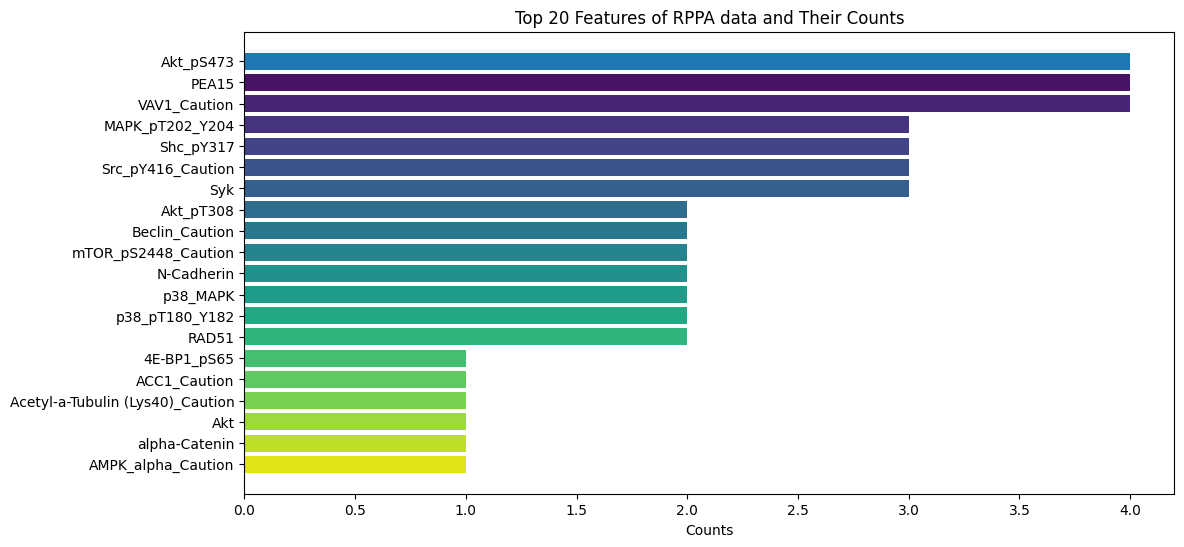

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Find the top 20 features most frequently selected
top_features_RPPA_with_counts = [(feature, count) for feature, count in Counter(selected_features_RPPA).most_common(20)]

# Extract the top 20 features and their counts into separate lists
top_20_features_RPPA = [feature for feature, count in top_features_RPPA_with_counts]
top_20_counts_RPPA = [count for feature, count in top_features_RPPA_with_counts]

# Define a single color shade that decreases for each feature
base_color = '#1f77b4'  # Base color

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a range of colors with decreasing brightness
colors = [base_color if i == 0 else plt.cm.viridis(i / 20) for i in range(20)]

# Create a colorful bar chart with decreasing color shade
bars = ax.barh(top_20_features_RPPA, top_20_counts_RPPA, color=colors)
plt.xlabel('Counts')
plt.title('Top 20 Features of RPPA data and Their Counts')
plt.gca().invert_yaxis()

# Display the chart
plt.show()


In [ ]:
import pandas as pd
from collections import Counter
import plotly.express as px

# Find the top 20 features most frequently selected
top_features_with_counts_RPPA = [(feature, count) for feature, count in Counter(selected_features_RPPA).most_common(20)]

# Create a DataFrame for the top 20 features and their counts
top_features_RPPA = pd.DataFrame(top_features_with_counts_RPPA, columns=['Feature', 'Count'])

# Create a treemap using Plotly Express
fig = px.treemap(top_features_RPPA, path=['Feature'], values='Count', color='Count')

# Customize the appearance of the treemap
fig.update_layout(
    title='Top 20 Features of RPPA and Their Counts (Treemap)',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the treemap
fig.show()


In [ ]:
final_rppa=CCLE_RPPA_toWork[['CELL_LINE'] +top_20_features_RPPA]

In [233]:
final_rppa.shape

(4775, 21)

Metabolomics

In [ ]:
CCLE_metabolomics=pd.read_csv('CCLE_metabolomics.csv')

In [ ]:
CCLE_metabolomics.shape

(5485, 234)

In [ ]:
CCLE_metabolomics= CCLE_metabolomics.dropna(subset=['DRUG_NAME', 'IC50', 'AUC', 'Cluster', 'IC50_Class'])

In [ ]:
CCLE_metabolomics.isna().sum()

CellLineName      0
CELL_LINE         0
CELL_LINE_NAME    0
DepMap_ID         0
2-aminoadipate    0
                 ..
DRUG_NAME         0
IC50              0
AUC               0
Cluster           0
IC50_Class        0
Length: 234, dtype: int64

In [ ]:
selected2=['DepMap_ID','CellLineName','CELL_LINE_NAME','DRUG_NAME', 'IC50', 'AUC','IC50_Class']

In [ ]:
CCLE_metabolomics_toWork = CCLE_metabolomics.drop(selected2,axis=1)

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from collections import Counter

# Define the feature selection methods
methods = [
    ('Mutual Information', SelectKBest(mutual_info_classif, k=20)),
    ('Random Forest', SelectKBest(lambda X, y: RandomForestClassifier(n_estimators=100).fit(X, y).feature_importances_, k=20)),
    ('Chi-squared', SelectKBest(chi2, k=20)),
    ('RFE', RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=20)),
    ('LASSO', SelectFromModel(Lasso(alpha=0.01))),
    # Add more methods as needed
]

# Initialize a dictionary to keep track of feature selections
selected_features_CCLE_metabolomics = {feature: 0 for feature in CCLE_metabolomics_toWork.columns}

# Define X and y outside the loop
X = CCLE_metabolomics_toWork.drop('Cluster', axis=1)  # Features
# Apply Min-Max scaling to make all values non-negative
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = CCLE_metabolomics_toWork['Cluster']  # Target

# Apply feature selection methods
for method_name, method in methods:
    # Fit the feature selection method
    method.fit(X, y)

    # Update the selected_features dictionary based on the selected features
    selected_indices_metabolomics = method.get_support(indices=True)
    for feature_idx in selected_indices_metabolomics:
        selected_features_CCLE_metabolomics[CCLE_metabolomics_toWork.columns[feature_idx]] += 1

# Find the top 20 features most frequently selected
top_20_features_CCLE_metabolomics = [feature for feature, count in Counter(selected_features_CCLE_metabolomics).most_common(20)]

# Create a new DataFrame with the top 20 features
top_20_counts_CCLE_metabolomics = CCLE_metabolomics_toWork[top_20_features_CCLE_metabolomics + ['Cluster']]


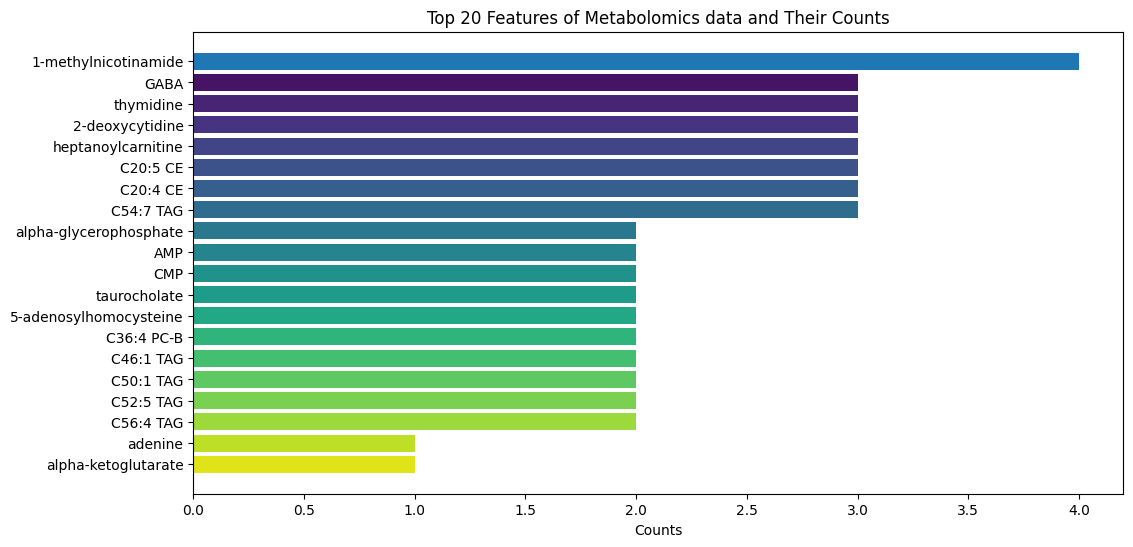

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Find the top 20 features most frequently selected
top_features_with_counts_CCLE_metabolomics = [(feature, count) for feature, count in Counter(selected_features_CCLE_metabolomics).most_common(20)]

# Extract the top 20 features and their counts into separate lists
top_20_features_CCLE_metabolomics = [feature for feature, count in top_features_with_counts_CCLE_metabolomics]
top_20_counts_CCLE_metabolomics = [count for feature, count in top_features_with_counts_CCLE_metabolomics]

# Define a single color shade that decreases for each feature
base_color = '#1f77b4'  # Base color

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a range of colors with decreasing brightness
colors = [base_color if i == 0 else plt.cm.viridis(i / 20) for i in range(20)]

# Create a colorful bar chart with decreasing color shade
bars = ax.barh(top_20_features_CCLE_metabolomics, top_20_counts_CCLE_metabolomics, color=colors)
plt.xlabel('Counts')
plt.title('Top 20 Features of Metabolomics data and Their Counts')
plt.gca().invert_yaxis()

# Display the chart
plt.show()


In [ ]:
import pandas as pd
from collections import Counter
import plotly.express as px

# Find the top 20 features most frequently selected
top_features_with_counts_CCLE_metabolomics = [(feature, count) for feature, count in Counter(selected_features_CCLE_metabolomics).most_common(20)]

# Create a DataFrame for the top 20 features and their counts
top_features_CCLE_metabolomics = pd.DataFrame(top_features_with_counts_CCLE_metabolomics, columns=['Feature', 'Count'])

# Create a treemap using Plotly Express
fig = px.treemap(top_features_CCLE_metabolomics, path=['Feature'], values='Count', color='Count')

# Customize the appearance of the treemap
fig.update_layout(
    title='Top 20 Features of metabolomics data and Their Counts (Treemap)',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the treemap
fig.show()


In [ ]:
top_20_features_CCLE_metabolomics

['1-methylnicotinamide',
 'GABA',
 'thymidine',
 '2-deoxycytidine',
 'heptanoylcarnitine',
 'C20:5 CE',
 'C20:4 CE',
 'C54:7 TAG',
 'alpha-glycerophosphate',
 'AMP',
 'CMP',
 'taurocholate',
 '5-adenosylhomocysteine',
 'C36:4 PC-B',
 'C46:1 TAG',
 'C50:1 TAG',
 'C52:5 TAG',
 'C56:4 TAG',
 'adenine',
 'alpha-ketoglutarate']

In [ ]:
final_metabolomics=CCLE_metabolomics_toWork[['CELL_LINE'] +top_20_features_CCLE_metabolomics]

In [ ]:
final_metabolomics

,CELL_LINE,1-methylnicotinamide,GABA,thymidine,2-deoxycytidine,heptanoylcarnitine,C20:5 CE,C20:4 CE,C54:7 TAG,alpha-glycerophosphate,...,CMP,taurocholate,5-adenosylhomocysteine,C36:4 PC-B,C46:1 TAG,C50:1 TAG,C52:5 TAG,C56:4 TAG,adenine,alpha-ketoglutarate
2,NCIH1694,5.332971,6.513363,6.947608,7.142500,5.647365,5.686882,5.846850,5.861075,5.541259,...,5.678911,5.947246,5.367730,5.700943,6.205165,6.143041,5.733025,6.137530,5.875548,5.839640
3,NCIH1694,5.332971,6.513363,6.947608,7.142500,5.647365,5.686882,5.846850,5.861075,5.541259,...,5.678911,5.947246,5.367730,5.700943,6.205165,6.143041,5.733025,6.137530,5.875548,5.839640
4,NCIH1694,5.332971,6.513363,6.947608,7.142500,5.647365,5.686882,5.846850,5.861075,5.541259,...,5.678911,5.947246,5.367730,5.700943,6.205165,6.143041,5.733025,6.137530,5.875548,5.839640
5,NCIH1694,5.332971,6.513363,6.947608,7.142500,5.647365,5.686882,5.846850,5.861075,5.541259,...,5.678911,5.947246,5.367730,5.700943,6.205165,6.143041,5.733025,6.137530,5.875548,5.839640
6,NCIH1694,5.332971,6.513363,6.947608,7.142500,5.647365,5.686882,5.846850,5.861075,5.541259,...,5.678911,5.947246,5.367730,5.700943,6.205165,6.143041,5.733025,6.137530,5.875548,5.839640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468,OE21,3.786443,6.333763,5.962563,5.934781,5.998872,5.896769,6.027035,6.010511,5.472012,...,5.543927,5.407624,6.221911,5.846288,5.819424,5.729395,5.880679,5.734713,6.025035,5.758985
5469,OE21,3.786443,6.333763,5.962563,5.934781,5.998872,5.896769,6.027035,6.010511,5.472012,...,5.543927,5.407624,6.221911,5.846288,5.819424,5.729395,5.880679,5.734713,6.025035,5.758985
5470,OE21,3.786443,6.333763,5.962563,5.934781,5.998872,5.896769,6.027035,6.010511,5.472012,...,5.543927,5.407624,6.221911,5.846288,5.819424,5.729395,5.880679,5.734713,6.025035,5.758985
5471,OE21,3.786443,6.333763,5.962563,5.934781,5.998872,5.896769,6.027035,6.010511,5.472012,...,5.543927,5.407624,6.221911,5.846288,5.819424,5.729395,5.880679,5.734713,6.025035,5.758985


Working with Drug data

In [ ]:
drugdata=pd.read_csv("CCLE_Scaffold.csv")

In [ ]:
throw=['IC50']
drugdata=drugdata.drop(throw,axis=1)

In [ ]:
drugdata

Merging of Dataframes

In [202]:
import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [225]:
drugchromatin_merge = final_chromatin.merge(drugdata, on='CELL_LINE', how='inner')

In [226]:
drugchromatin_merge.shape

(211279, 76)

In [227]:
drugchromatin_merge=drugChromatin_merge.drop_duplicates()

In [228]:
drugchromatin_merge.shape

(21759, 76)

In [215]:
drugRPPA_merge=final_rppa.merge(drugdata, on='CELL_LINE', how='inner')

In [216]:
drugRPPA_merge.shape

(210220, 76)

In [217]:
drugRPPA_merge=drugRPPA_merge.drop_duplicates()

In [218]:
drugRPPA_merge.shape

(14388, 76)

In [220]:
drugmetabolics_merge=final_metabolomics.merge(drugdata,on='CELL_LINE',how='inner')

In [221]:
drugmetabolics_merge.shape

(214901, 76)

In [222]:
drugmetabolics_merge=drugmetabolics_merge.drop_duplicates()

In [ ]:
drugmetabolics_merge.shape

In [239]:
drugchromatinrrpa_merge=drugchromatin_merge.merge(final_rppa,on='CELL_LINE',how='inner')
drugchromatinrrpa_merge=drugchromatinrrpa_merge.drop_duplicates()
drugchromatinmetabolomics_merge=drugchromatin_merge.merge(final_metabolomics,on='CELL_LINE',how='inner')
drugchromatinmetabolomics_merge=drugchromatinmetabolomics_merge.drop_duplicates()
drugrrpametabolomics_merge=drugRPPA_merge.merge(final_metabolomics,on='CELL_LINE',how='inner')
drugrrpametabolomics_merge=drugrrpametabolomics_merge.drop_duplicates()

In [240]:
drugrrpametabolomics_merge.shape

(14292, 96)

In [238]:
drugchromatinmetabolomics_merge.shape

(21663, 96)

In [235]:
drugchromatinrrpa_merge.shape

(20700, 96)

Merge all

In [243]:
# Merging the DataFrames using 'inner' join on 'CELL_LINE'
drugALLomics_merge = drugdata.merge(final_rppa, on='CELL_LINE', how='inner')
drugALLomics_merge = drugALLomics_merge.drop_duplicates()
drugALLomics_merge = drugALLomics_merge.merge(final_chromatin, on='CELL_LINE', how='inner')
drugALLomics_merge = drugALLomics_merge.drop_duplicates()
drugALLomics_merge = drugALLomics_merge.merge(final_metabolomics, on='CELL_LINE', how='inner')

# Removing duplicate rows
drugALLomics_merge = drugALLomics_merge.drop_duplicates()

In [244]:
drugALLomics_merge.shape

(20604, 116)

In [ ]:
drugALLomics_merge.head(1)

In [ ]:
drugALLomics_merge.to_csv('drugALLomics_merge.csv',index=False)